In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import TextParser, TensorDecomposer, Corpus, download

In [3]:
corpus = Corpus(filename='convokit/tensors/longreddit_construction/long-reddit-corpus-liwc-lite')

In [4]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'ppron', 'prep', 'quant'}


# for utt in corpus.iter_utterances():
#     if 'prep' in utt.meta:
#         for cat in cats:
#             utt.meta[cat+'-present'] = (utt.meta[cat]) > 0

In [5]:
# corpus.dump('long-reddit-corpus-liwc-lite', base_path='convokit/tensors/longreddit_construction')

In [6]:
cats
cats_present = {k+"-present" for k in cats}

In [7]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()[:20]):
        convo.meta['liwc-{}'.format(idx+1)] = {k: utt.meta[k] for k in cats_present}

In [8]:
td = TensorDecomposer(feature_set=['liwc-{}'.format(idx) for idx in range(1, 20+1)], 
                      obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [9]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.5247327669660927, improvement inf.
NCP_BCD: iteration 2, objective 0.5132584638224343, improvement 0.011474303143658382.
NCP_BCD: iteration 3, objective 0.5067582859111228, improvement 0.006500177911311522.
NCP_BCD: iteration 4, objective 0.5030667404511736, improvement 0.003691545459949208.
NCP_BCD: iteration 5, objective 0.5009145007331559, improvement 0.002152239718017701.
NCP_BCD: iteration 6, objective 0.499570313213418, improvement 0.001344187519737916.
NCP_BCD: iteration 7, objective 0.4986322903747506, improvement 0.0009380228386673961.
NCP_BCD: iteration 8, objective 0.4978866715801759, improvement 0.0007456187945746873.
NCP_BCD: iteration 9, objective 0.49722862297271897, improvement 0.0006580486074569403.
NCP_BCD: iteration 10, objective 0.4966227821166621, improvement 0.0006058408560568607.
NCP_BCD: iteration 11, objective 0.49607216156756945, improvement 0.0005506205490926619.
NCP_BCD: itera

Directory already exists. Exiting summarize()


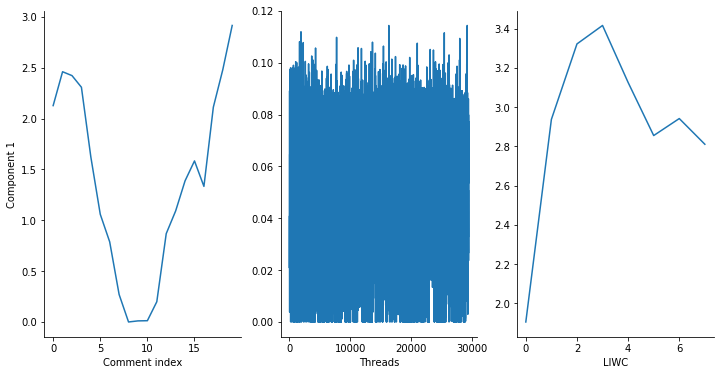

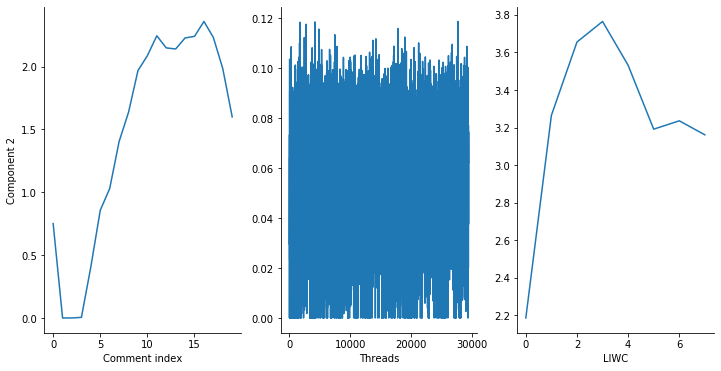

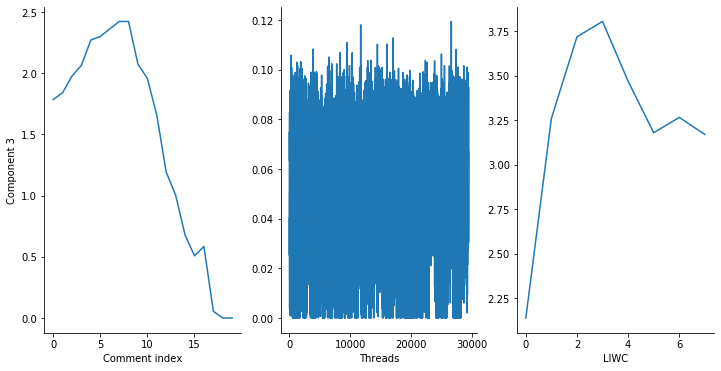

In [10]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
            output_dir='convokit/tensor_decomposer/reports/liwc-TCA')

In [11]:
cats

{'adverb', 'article', 'auxverb', 'conj', 'ipron', 'ppron', 'prep', 'quant'}